<a href="https://colab.research.google.com/github/bomul0417/study/blob/main/NIDS_Project/KDD(Dos)_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [2]:
df_url = 'https://raw.githubusercontent.com/bomul0417/study/main/NIDS_Project/nsl-kdd/NSL_KDD_Train.csv'
df2_url = 'https://raw.githubusercontent.com/bomul0417/study/main/NIDS_Project/nsl-kdd/NSL_KDD_Test.csv'

In [3]:
columns = ['duration','protocol_type','service','flag','src_bytes',
    'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
    'logged_in','num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
    'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','label']


df = pd.read_csv(df_url, names = columns)

df2 = pd.read_csv(df2_url, names = columns)

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [5]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


# df + df2

In [6]:
newdf = pd.concat([df,df2], ignore_index=True)
newdf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


결측값 여부 확인

In [7]:
newdf.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
newdf.to_csv("New_NSL-KDD.csv", mode='w')

# 공격타입 지정

In [51]:
# 0:normal, 1:dos, 2:probe, 3:r2l, 4:u2r
dfdos = newdf.replace(['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm'], 1)
dfr2l = dfdos.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 3)
dfu2r = dfr2l.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 4)
dfprobe = dfu2r.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 2)
dfnormal = dfprobe.replace(['normal'], 0)
df_type = dfnormal
df_type

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.000000000,0.050000000,0.000000000,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.100000000,0.050000000,0.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.000000000,0.000000000,0.030000000,0.040000000,0.030000000,0.010000000,0.000000000,0.010000000,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.720000000,0.060000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000,0
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.000000000,0.000000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000,0
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000,0.070000000,1
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.990000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0


In [52]:
df_type.value_counts('label')

label
0    77054
1    53385
2    14077
3     3882
4      119
dtype: int64

'Dos', 'Normal' 값만 추출

In [54]:
condition = (df_type.label == 0) | (df_type.label == 1) #| (df_type.label == 'probe') | (df_type.label == 'r2l') | (df_type.label == 'u2r')
df_dos = df_type[condition]
df_dos = df_dos.reset_index(drop=True)
df_dos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.000000000,0.050000000,0.000000000,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.100000000,0.050000000,0.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.000000000,0.000000000,0.030000000,0.040000000,0.030000000,0.010000000,0.000000000,0.010000000,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1
130435,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.720000000,0.060000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000,0
130436,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.000000000,0.000000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000,0
130437,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000,0.070000000,1


In [55]:
df_dos.value_counts('label')

label
0    77054
1    53385
dtype: int64

In [56]:
for columns in df.columns:
  if df_dos[columns].dtypes == 'object':
    print(columns, '\n종류:', df_dos[columns].unique(), '\n개수:', df_dos[columns].nunique(), '\n')

protocol_type 
종류: ['tcp' 'udp' 'icmp'] 
개수: 3 

service 
종류: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50' 'smtp'
 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp' 'bgp'
 'ldap' 'ecr_i' 'vmnet' 'systat' 'http_443' 'efs' 'whois' 'gopher' 'imap4'
 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell' 'time'
 'sql_net' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier' 'eco_i'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i' 'tftp_u'] 
개수: 65 

flag 
종류: ['SF' 'S0' 'REJ' 'RSTO' 'S1' 'RSTR' 'S3' 'S2' 'OTH' 'SH' 'RSTOS0'] 
개수: 11 



In [57]:
df_dos_obj = df_dos[['protocol_type','service','flag']]
df_dos_obj

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
130434,icmp,ecr_i,SF
130435,tcp,smtp,SF
130436,tcp,http,SF
130437,tcp,http,SF


# 컬럼 분류

In [58]:
newdos = df_dos.drop(columns=['label'])
newlabel = df_dos['label']

In [16]:
newdos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
130435,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
130436,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
130437,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07


# LabelEncoding

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(newdos['protocol_type'])
protocol = le.transform(newdos['protocol_type'])

le.fit(newdos['service'])
service = le.transform(newdos['service'])

le.fit(newdos['flag'])
flag = le.transform(newdos['flag'])

newdos['protocol_type'] = protocol
newdos['service'] = service
newdos['flag'] = flag

In [28]:
dosle = newdos
yle = newlabel
dosle

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.000000000,0.050000000,0.000000000
1,0,2,40,9,146,0,0,0,0,0,...,255,1,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
2,0,1,44,5,0,0,0,0,0,0,...,255,26,0.100000000,0.050000000,0.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.000000000,0.000000000,0.030000000,0.040000000,0.030000000,0.010000000,0.000000000,0.010000000
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0,0,14,9,1032,0,0,0,0,0,...,255,255,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
130435,0,1,49,9,794,333,0,0,0,0,...,100,141,0.720000000,0.060000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000
130436,0,1,22,9,317,938,0,0,0,0,...,197,255,1.000000000,0.000000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000
130437,0,1,22,9,54540,8314,0,0,0,2,...,255,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000,0.070000000


## 정규화

In [29]:
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.9f}'.format #지수표현 X
#pd.reset_option('display.float_format') 

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dosle)

xle = pd.DataFrame(np_scaled, columns = dosle.columns)

xle

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000000,0.500000000,0.296875000,0.900000000,0.000005481,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.588235294,0.098039216,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.000000000,0.050000000,0.000000000
1,0.000000000,1.000000000,0.625000000,0.900000000,0.000001630,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,0.003921569,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
2,0.000000000,0.500000000,0.687500000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,0.101960784,0.100000000,0.050000000,0.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000
3,0.000000000,0.500000000,0.343750000,0.900000000,0.000002590,0.001159966,0.000000000,0.000000000,0.000000000,0.000000000,...,0.117647059,1.000000000,1.000000000,0.000000000,0.030000000,0.040000000,0.030000000,0.010000000,0.000000000,0.010000000
4,0.000000000,0.500000000,0.343750000,0.900000000,0.000002221,0.000059755,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,1.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0.000000000,0.000000000,0.218750000,0.900000000,0.000011520,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,1.000000000,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
130435,0.000000000,0.500000000,0.765625000,0.900000000,0.000008863,0.000047378,0.000000000,0.000000000,0.000000000,0.000000000,...,0.392156863,0.552941176,0.720000000,0.060000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000
130436,0.000000000,0.500000000,0.343750000,0.900000000,0.000003539,0.000133454,0.000000000,0.000000000,0.000000000,0.000000000,...,0.772549020,1.000000000,1.000000000,0.000000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000
130437,0.000000000,0.500000000,0.343750000,0.900000000,0.000608831,0.001182873,0.000000000,0.000000000,0.000000000,0.019801980,...,1.000000000,1.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000,0.070000000


## 데이터셋 분류

In [30]:
from sklearn.model_selection import train_test_split

xle, xle_test, yle, yle_test = train_test_split(xle, yle, test_size=0.2, random_state=2022)

print(xle.shape, yle.shape)
print(xle_test.shape, yle_test.shape)

(104351, 41) (104351,)
(26088, 41) (26088,)


In [31]:
x=xle.head(1000)
x_test=xle_test.head(200)
y=yle.head(1000)
y_test=yle_test.head(200)

In [32]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
108930,0.000000000,0.500000000,0.343750000,0.900000000,0.000002456,0.001435695,0.000000000,0.000000000,0.000000000,0.000000000,...,0.058823529,1.000000000,1.000000000,0.000000000,0.070000000,0.030000000,0.000000000,0.000000000,0.000000000,0.000000000
5253,0.119648859,1.000000000,0.625000000,0.900000000,0.000001641,0.000014939,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,0.003921569,0.000000000,0.520000000,0.950000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
109496,0.000000000,1.000000000,0.687500000,0.900000000,0.000001172,0.000020914,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,0.882352941,0.880000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
37198,0.000000000,1.000000000,0.171875000,0.900000000,0.000000480,0.000009959,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,0.886274510,0.890000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
36803,0.000000000,1.000000000,0.687500000,0.900000000,0.000001172,0.000020630,0.000000000,0.000000000,0.000000000,0.000000000,...,0.047058824,0.015686275,0.330000000,0.250000000,0.080000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,0.000000000,0.500000000,0.343750000,0.900000000,0.000002233,0.000074694,0.000000000,0.000000000,0.000000000,0.000000000,...,0.031372549,1.000000000,1.000000000,0.000000000,0.120000000,0.030000000,0.000000000,0.000000000,0.000000000,0.000000000
3930,0.000000000,0.500000000,0.390625000,0.100000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,1.000000000,0.047058824,0.050000000,0.080000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,1.000000000
40177,0.000000000,0.500000000,0.343750000,0.900000000,0.000002288,0.000737410,0.000000000,0.000000000,0.000000000,0.000000000,...,0.023529412,1.000000000,1.000000000,0.000000000,0.170000000,0.020000000,0.000000000,0.000000000,0.000000000,0.000000000
25027,0.000000000,0.500000000,0.343750000,0.900000000,0.000001976,0.001563315,0.000000000,0.000000000,0.000000000,0.000000000,...,0.043137255,1.000000000,1.000000000,0.000000000,0.090000000,0.030000000,0.000000000,0.000000000,0.000000000,0.000000000


In [33]:
y

108930    normal
5253      normal
109496    normal
37198     normal
36803     normal
           ...  
9596      normal
3930         dos
40177     normal
25027     normal
53098     normal
Name: label, Length: 1000, dtype: object

In [34]:
yle_test.value_counts()

normal    15402
dos       10686
Name: label, dtype: int64

## 모델학습

In [25]:
'''from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x, y)

ytest_preds = xgb.predict(x_test)

print('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))'''

"from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\nxgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)\nxgb.fit(x, y)\n\nytest_preds = xgb.predict(x_test)\n\nprint('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))"

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(xle, yle)

yle_preds = xgb.predict(xle_test)

print('Accuracy: %.2f' % accuracy_score(yle_test, yle_preds))

Accuracy: 1.00


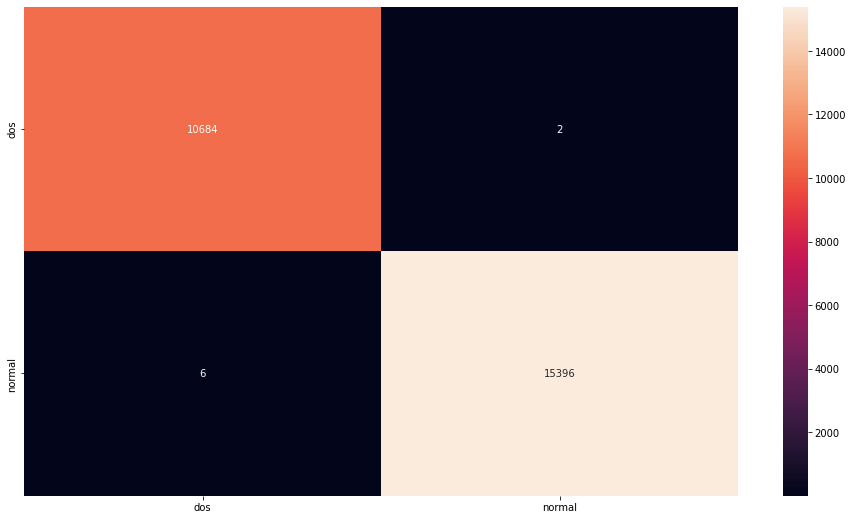

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yle_test, yle_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True,
    fmt='g', 
    xticklabels=['dos', 'normal'],
    yticklabels=['dos', 'normal']
    #xticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r'],
    #yticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r']
)
plt.show()

## 특징 중요도

In [41]:
pip install eli5

In [42]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state=1).fit(xle_test, yle_test)
eli5.show_weights(perm, feature_names = xle_test.columns.tolist())

Weight,Feature
0.0284 ± 0.0012,src_bytes
0.0068 ± 0.0007,dst_bytes
0.0045 ± 0.0001,wrong_fragment
0.0035 ± 0.0002,protocol_type
0.0018 ± 0.0006,count
0.0009 ± 0.0001,dst_host_serror_rate
0.0009 ± 0.0003,flag
0.0007 ± 0.0002,dst_host_rerror_rate
0.0005 ± 0.0001,dst_host_same_src_port_rate
0.0003 ± 0.0001,dst_host_diff_srv_rate


# OneHot Encoding

In [59]:
dosoh = pd.get_dummies(newdos, columns=['protocol_type','service','flag'])
yoh = newlabel

dosoh

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130435,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
130436,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
130437,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0


## 정규화

In [60]:
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.9f}'.format #지수표현 X
#pd.reset_option('display.float_format') 

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dosoh)

xoh = pd.DataFrame(np_scaled, columns = dosoh.columns)

xoh

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000000,0.000005481,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
1,0.000000000,0.000001630,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
2,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
3,0.000000000,0.000002590,0.001159966,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
4,0.000000000,0.000002221,0.000059755,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0.000000000,0.000011520,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
130435,0.000000000,0.000008863,0.000047378,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
130436,0.000000000,0.000003539,0.000133454,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
130437,0.000000000,0.000608831,0.001182873,0.000000000,0.000000000,0.000000000,0.019801980,0.000000000,1.000000000,0.000133708,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000


## 데이터셋 분류

In [61]:
from sklearn.model_selection import train_test_split

xoh, xoh_test, yoh, yoh_test = train_test_split(xoh, yoh, test_size=0.2, random_state=2022)

print(xoh.shape, yoh.shape)
print(xoh_test.shape, yoh_test.shape)

(104351, 117) (104351,)
(26088, 117) (26088,)


In [119]:
'''x=xoh.head(100)
x_test=xoh_test.head(20)
y=yoh.head(100)
y_test=yoh_test.head(20)'''
xcol=list(xoh) #rfe 알고리즘 사용 후 컬럼삭제 되므로 저장

In [120]:
xoh

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
108930,0.000000000,0.000002456,0.001435695,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
5253,0.119648859,0.000001641,0.000014939,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
109496,0.000000000,0.000001172,0.000020914,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
37198,0.000000000,0.000000480,0.000009959,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
36803,0.000000000,0.000001172,0.000020630,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46769,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
103024,0.000000000,0.000002367,0.000170303,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
16557,0.000000000,0.000088634,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
1244,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000


In [121]:
xoh.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=117)

In [122]:
yoh_test.value_counts()

0    15402
1    10686
Name: label, dtype: int64

## RFE 알고리즘

In [130]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rfe = RFE(estimator=clf, n_features_to_select=21, step=1)

xnewcol = []
rfe.fit(xoh, yoh)
for i in range(xoh.shape[1]):
  if rfe.support_[i] == True:
    xnewcol.append(xcol[i])
    print('Column: %s' % (xcol[i]))



Column: duration
Column: src_bytes
Column: dst_bytes
Column: wrong_fragment
Column: hot
Column: count
Column: srv_count
Column: serror_rate
Column: srv_serror_rate
Column: same_srv_rate
Column: diff_srv_rate
Column: dst_host_count
Column: dst_host_srv_count
Column: dst_host_same_srv_rate
Column: dst_host_diff_srv_rate
Column: dst_host_same_src_port_rate
Column: dst_host_srv_serror_rate
Column: dst_host_rerror_rate
Column: protocol_type_icmp
Column: service_ecr_i
Column: flag_SF


In [134]:
print(len(xnewcol))
xnewcol

21


['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'service_ecr_i',
 'flag_SF']

In [139]:
xoh_dos = rfe.transform(xoh)
xoh_dos.shape

(104351, 21)

In [140]:
xoh_dos

array([[0.00000000e+00, 2.45586366e-06, 1.43569492e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.19648859e-01, 1.64096345e-06, 1.49388531e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.17211675e-06, 2.09143944e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 8.86343523e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.34890500e-07, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [141]:
xoh_rfedos = pd.DataFrame(xoh_dos, columns=xnewcol)
xoh_rfedos

,duration,src_bytes,dst_bytes,wrong_fragment,hot,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,protocol_type_icmp,service_ecr_i,flag_SF
0,0.000000000,0.000002456,0.001435695,0.000000000,0.000000000,0.009784736,0.009784736,0.000000000,0.000000000,1.000000000,...,0.058823529,1.000000000,1.000000000,0.000000000,0.070000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000
1,0.119648859,0.000001641,0.000014939,0.000000000,0.000000000,0.009784736,0.001956947,0.000000000,0.000000000,0.200000000,...,1.000000000,0.003921569,0.000000000,0.520000000,0.950000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000
2,0.000000000,0.000001172,0.000020914,0.000000000,0.000000000,0.015655577,0.001956947,0.000000000,0.000000000,0.120000000,...,1.000000000,0.882352941,0.880000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000
3,0.000000000,0.000000480,0.000009959,0.000000000,0.000000000,0.313111546,0.317025440,0.000000000,0.000000000,1.000000000,...,1.000000000,0.886274510,0.890000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000
4,0.000000000,0.000001172,0.000020630,0.000000000,0.000000000,0.001956947,0.001956947,0.000000000,0.000000000,1.000000000,...,0.047058824,0.015686275,0.330000000,0.250000000,0.080000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104346,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.205479452,0.033268102,1.000000000,1.000000000,0.160000000,...,1.000000000,0.066666667,0.070000000,0.050000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000
104347,0.000000000,0.000002367,0.000170303,0.000000000,0.000000000,0.003913894,0.003913894,0.000000000,0.000000000,1.000000000,...,0.301960784,1.000000000,1.000000000,0.000000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000
104348,0.000000000,0.000088634,0.000000000,0.000000000,0.000000000,0.017612524,0.017612524,0.000000000,0.000000000,1.000000000,...,1.000000000,0.207843137,0.210000000,0.470000000,0.210000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000
104349,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.027397260,0.013698630,1.000000000,1.000000000,0.500000000,...,1.000000000,0.105882353,0.110000000,0.070000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000


## 모델학습

In [33]:
'''from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x, y)

ytest_preds = xgb.predict(x_test)

print('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))'''

"from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\nxgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)\nxgb.fit(x, y)\n\nytest_preds = xgb.predict(x_test)\n\nprint('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))"

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(xoh, yoh)

yoh_preds = xgb.predict(xoh_test)

print('Accuracy: %.2f' % accuracy_score(yoh_test, yoh_preds))

Accuracy: 1.00


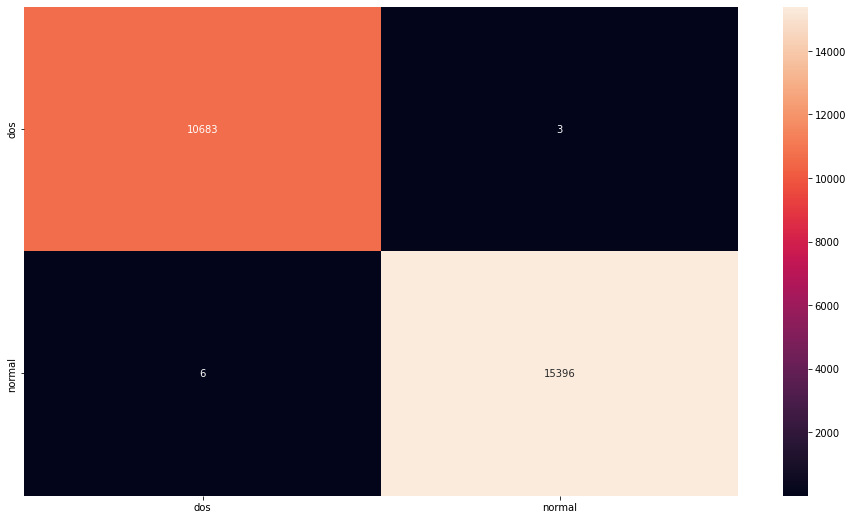

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yoh_test, yoh_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True, 
    fmt='g',
    xticklabels=['dos', 'normal'],
    yticklabels=['dos', 'normal']
    #xticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r'],
    #yticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r']
)
plt.show()

## 특징 중요도


In [43]:
pip install eli5

In [47]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state=1).fit(xoh_test, yoh_test)
eli5.show_weights(perm, feature_names = xoh_test.columns.tolist())

Weight,Feature
0.0482 ± 0.0019,src_bytes
0.0067 ± 0.0008,dst_bytes
0.0029 ± 0.0001,service_14
0.0029 ± 0.0003,dst_host_rerror_rate
0.0015 ± 0.0005,count
0.0014 ± 0.0002,dst_host_serror_rate
0.0009 ± 0.0003,dst_host_same_src_port_rate
0.0008 ± 0.0001,wrong_fragment
0.0002 ± 0.0001,srv_count
0.0002 ± 0.0001,dst_host_diff_srv_rate
